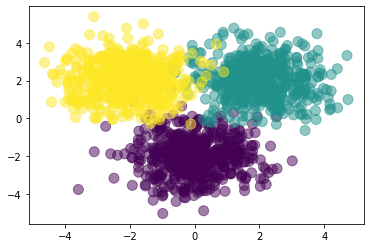

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#generate random data
n = 500

X1 = np.random.randn(n, 2) + np.array([0, -2])
X2 = np.random.randn(n, 2) + np.array([2, 2])
X3 = np.random.randn(n, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*n + [1]*n + [2]*n)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

T = np.zeros((len(Y), 3))
for i in range(len(Y)):
  T[i, Y[i]] = 1

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X, T = shuffle(X, T)
X_train, X_test, Y_train, Y_test = train_test_split(X, T, test_size=0.2)

N, D = X_train.shape

def softmax(y):
  ye = np.exp(y)
  ys = np.sum(ye, axis=1, keepdims=True)
  return ye/ys

def feedforward(X, W, b):
  Y = softmax(X.dot(W) + b)
  return Y

def der_W(t, y, X):
    return X.T.dot(t - y)

def der_b(t, y):
    return (t - y).sum(axis=0)

def cost(p_y, t):
    return (-t * np.log(p_y)).sum()

def predict(p_y):
    return np.argmax(p_y, axis=1)

def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(predict(p_y) != predict(t))

In [0]:
from datetime import datetime

# Full GD
W = np.random.randn(D, 3) / np.sqrt(D)
b = np.zeros(3)
LL = []
lr = 0.0001
reg = 0.01

t0 = datetime.now()
for i in range(50):
    output = feedforward(X_train, W, b)

    W += lr*(der_W(Y_train, output, X_train) - reg*W)
    b += lr*(der_b(Y_train, output) - reg*b)
    
    output_test = feedforward(X_test, W, b)
    ll = cost(output_test, Y_test)
    LL.append(ll)

output = feedforward(X_test, W, b)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for full GD:", datetime.now() - t0)

Final error rate: 0.01
Elapsted time for full GD: 0:00:00.022576


In [0]:
# Stochastic GD
W = np.random.randn(D, 3) / np.sqrt(D)
b = np.zeros(3)
LL_stochastic = []
lr = 0.0001
reg = 0.01
N = 1500

t0 = datetime.now()
for i in range(50):
    tmpX, tmpY = shuffle(X_train, Y_train)
    for n in range(1200):
        x = X_train[n,:].reshape(1,D)
        y = Y_train[n,:].reshape(1,3)
        output = feedforward(x, W, b)

        W += lr*(der_W(y, output, x) - reg*W)
        b += lr*(der_b(y, output) - reg*b)

        output_test = feedforward(X_test, W, b)
        ll = cost(output_test, Y_test)
        LL_stochastic.append(ll)

output = feedforward(X_test, W, b)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for SGD:", datetime.now() - t0)

Final error rate: 0.01
Elapsted time for SGD: 0:00:07.798507


In [0]:
#Batch GD
W = np.random.randn(D, 3) / np.sqrt(D)
b = np.zeros(3)
LL_batch = []
lr = 0.0001
reg = 0.01
batch_sz = 250
n_batches = N // batch_sz

t0 = datetime.now()
for i in range(50):
    for j in range(n_batches):
        x = X_train[j*batch_sz:(j*batch_sz + batch_sz),:]
        y = Y_train[j*batch_sz:(j*batch_sz + batch_sz),:]
        output = feedforward(x, W, b)

        W += lr*(der_W(y, output, x) - reg*W)
        b += lr*(der_b(y, output) - reg*b)

        output_test = feedforward(X_test, W, b)
        ll = cost(output_test, Y_test)
        LL_batch.append(ll)

output = feedforward(X_test, W, b)
print("Final error rate:", error_rate(output, Y_test))
print("Elapsed time for batch GD:", datetime.now() - t0)

Final error rate: 0.016666666666666666
Elapsted time for batch GD: 0:00:00.058905


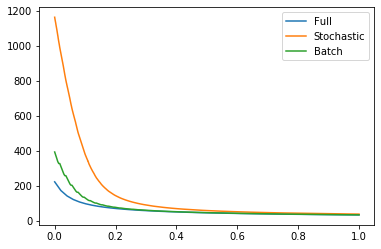

In [0]:
x1 = np.linspace(0, 1, len(LL))
plt.plot(x1, LL, label="Full")
x2 = np.linspace(0, 1, len(LL_stochastic))
plt.plot(x2, LL_stochastic, label="Stochastic")
x3 = np.linspace(0, 1, len(LL_batch))
plt.plot(x3, LL_batch, label="Batch")
plt.legend()
plt.show()